IMPORTING THE LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

DATA COLLECTION AND PROCESSING


In [5]:
#loading the csv data to a pandas Dataframe
gold_data = pd.read_csv(r"C:\Users\ISHABIYI SIMON\Downloads\archive(9)\gld_price_data.csv")

In [6]:
# print first 5 rows in the dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [9]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [14]:
#checking the number of missing values in each column
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [15]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


CORRELATION 
1.) POSITIVE CORRELATION
2.) NEGATIVE CORRELATION

In [17]:
correlation = gold_data.corr()

<AxesSubplot:>

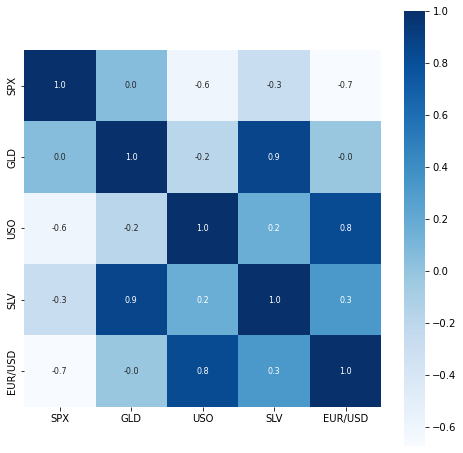

In [22]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f' , annot = True, annot_kws = {'size': 8} , cmap = 'Blues')

In [23]:
#correlation values of GLD
print(correlation['GLD'] )

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

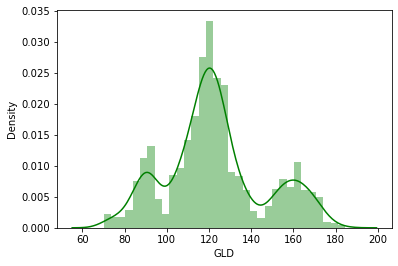

In [24]:
#checking the distribution of the GLD price
sns.distplot(gold_data['GLD'], color ='green')

SPLITTING THE FEATURES AND TARGET

In [25]:
X = gold_data.drop(['Date','GLD'],axis = 1)
Y = gold_data['GLD']

In [26]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [27]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


SPLITTING THE DATA INTO TRAINING DATA AND TEST DATA

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split (X,Y , test_size = 0.2, random_state = 2)

MODEL TRAINING : RANDOM TRAINING REGRESSOR

In [29]:
regressor = RandomForestRegressor(n_estimators=100)

In [30]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

MODEL EVALUATION

In [31]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [32]:
print(test_data_prediction)

[168.61829944  81.84529985 115.64880058 127.71670062 120.81960134
 154.77449781 150.61439907 126.07049981 117.58889866 126.07480101
 116.71000069 172.84290066 140.84559779 167.84749847 115.13520048
 117.51250048 139.00980315 170.15800103 159.9817031  161.35489921
 155.14859988 125.12529987 175.99089896 157.04270345 125.21620043
  93.71679943  77.54219988 120.65209992 119.09949941 167.60109933
  88.21970042 125.07420016  90.98470081 117.56140013 121.17349935
 136.16920175 115.24560129 115.02370077 147.28819949 107.35110099
 104.73960247  87.28249819 126.50440031 117.88009988 154.95819873
 119.51640035 108.51139969 107.85729826  93.24400033 127.32339737
  74.55630059 113.5704994  121.34620043 111.36229904 118.88089896
 120.60249927 158.69109959 168.30730089 146.88239699  85.73699856
  94.09460056  86.72199912  90.4948001  118.72100117 126.47950065
 127.63570007 168.65620038 122.33419929 117.34059886  98.34300033
 167.91530124 142.93859719 132.07550286 121.18850227 120.97779927
 119.83900

In [34]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error :', error_score)

R squared error : 0.9898584312035211


COMPARE THE ACTUAL VALUES AND PREDICTED VALUES IN A PLOT

In [35]:
Y_test = list(Y_test)

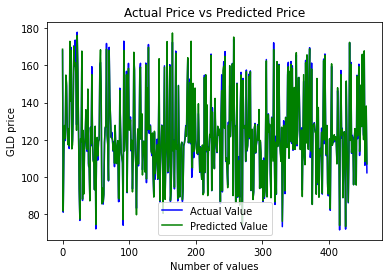

In [37]:
plt.plot(Y_test, color = 'Blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green' , label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()